### HW3

### [0] Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import warnings

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')
y = list(train['TARGET'])
train = train.drop('TARGET', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

***

### [1] DecisionTreeClassifier: ROC_AUC ~ max_depth

In [5]:
max_depth_opts = np.linspace(2, 60, 30).astype(int).tolist()
dtc_rocs = []

In [6]:
%%time
for md in tqdm(max_depth_opts):
    
    dtc = DecisionTreeClassifier(max_depth=md)
    dtc.fit(X_train, y_train)
    
    pred = dtc.predict_proba(X_test)[:,1]
    dtc_rocs.append(roc_auc_score(y_test, pred))

100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


Wall time: 1min 10s


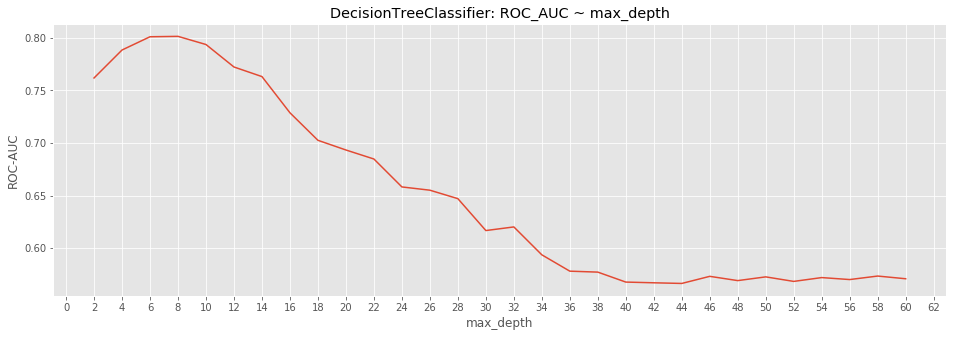

In [7]:
fig, ax = plt.subplots(figsize=(16,5))

ax.set_xticks(np.arange(0, 65, 2))
ax.plot(max_depth_opts, dtc_rocs)

ax.set_title('DecisionTreeClassifier: ROC_AUC ~ max_depth')
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('max_depth');

***

In [8]:
# масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### [2] KNeighborsClassifier: ROC_AUC ~ n_neighbors

In [9]:
kbest = SelectKBest(k=50)
X_train_best = kbest.fit_transform(X_train_scaled, y_train)
X_test_best = kbest.transform(X_test_scaled)

In [10]:
n_neighbors_opts = np.linspace(1, 60, 13).astype(int).tolist()
knc_rocs = []

In [11]:
%%time
for nn in tqdm(n_neighbors_opts):
    
    knc = KNeighborsClassifier(n_neighbors=nn)
    knc.fit(X_train_best, y_train)
    
    pred = knc.predict_proba(X_test_best)[:,1]
    knc_rocs.append(roc_auc_score(y_test, pred))

100%|██████████| 13/13 [17:33<00:00, 81.07s/it]


Wall time: 17min 33s


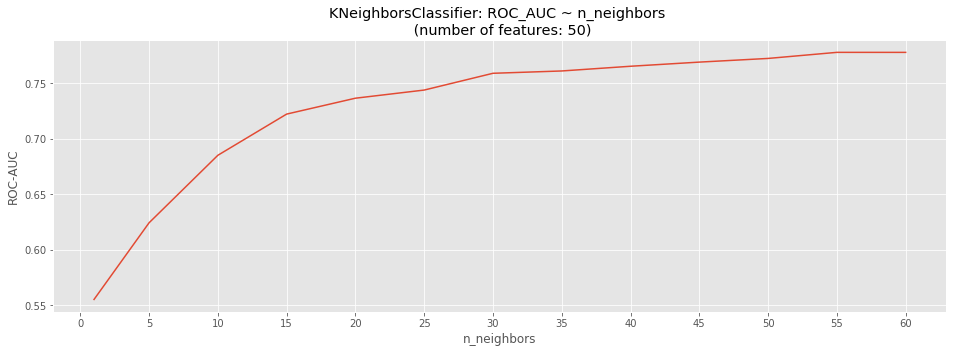

In [12]:
fig, ax = plt.subplots(figsize=(16,5))

ax.set_xticks(np.arange(0, 65, 5))
ax.plot(n_neighbors_opts, knc_rocs)

ax.set_title('KNeighborsClassifier: ROC_AUC ~ n_neighbors \n (number of features: {:.0f})'.format(kbest.k))
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('n_neighbors');

***

### [3] LogisticRegression: ROC_AUC ~ penalty, C

In [13]:
C_opts = [1e-6, 3e-6, 5e-6, 7e-6, 1e-5, 3e-5, 5e-5, 7e-5, 1e-4, 3e-4, 5e-4, 7e-4, 1e-3, 3e-3, 5e-3, 7e-3, 1e-2, 3e-2, 
          5e-2, 7e-2, 1e-1, 0.5, 1, 10, 50, 100, 500, 1000, 5000, 10000]
lr_l1_rocs = []
lr_l2_rocs = []

In [14]:
%%time
for cc in tqdm(C_opts):
    
    lr_l1 = LogisticRegression(C=cc, penalty='l1', solver='saga')
    lr_l2 = LogisticRegression(C=cc, penalty='l2')   
    lr_l1.fit(X_train_scaled, y_train)
    lr_l2.fit(X_train_scaled, y_train)
    
    pred_l1 = lr_l1.predict_proba(X_test_scaled)[:,1]
    pred_l2 = lr_l2.predict_proba(X_test_scaled)[:,1]  
    lr_l1_rocs.append(roc_auc_score(y_test, pred_l1))
    lr_l2_rocs.append(roc_auc_score(y_test, pred_l2))

100%|██████████| 30/30 [33:58<00:00, 67.96s/it]


Wall time: 33min 58s


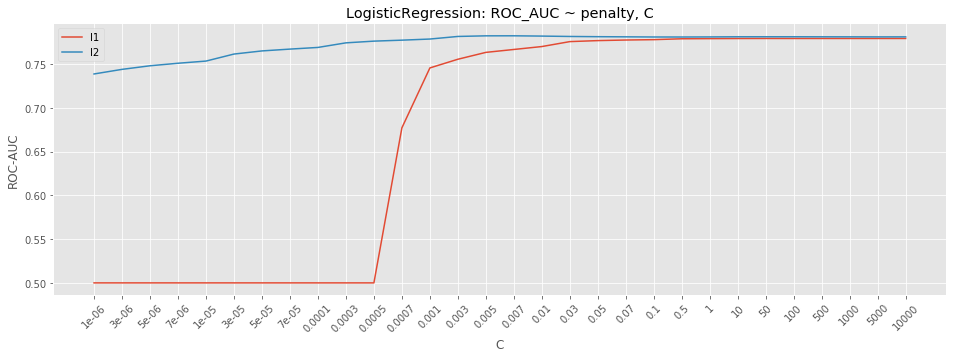

In [16]:
fig, ax = plt.subplots(figsize=(16,5))

ax.plot(np.linspace(1,len(C_opts),len(C_opts)), lr_l1_rocs, label='l1')
ax.plot(np.linspace(1,len(C_opts),len(C_opts)), lr_l2_rocs, label='l2')
ax.set_xticks(np.linspace(1,len(C_opts),len(C_opts)))
ax.set_xticklabels(C_opts)
plt.xticks(rotation=45)

ax.set_title('LogisticRegression: ROC_AUC ~ penalty, C')
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('C')
ax.legend();